## Part I 

In [1]:
# Github account link (should also be shared): https://github.com/ElijahReeb/UW-EE399-Machine-Learning-Demonstrations
# please email me elireeb@uw.edu if there are any issues with this. I am new to github and want to learn 

## Part II

In [1]:
# import cell
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

Minimum Error =  1.5927258513504776


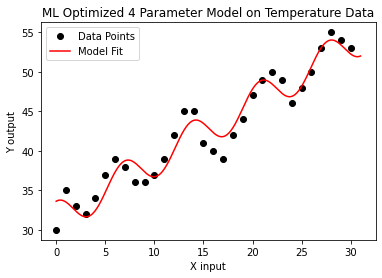

Parameters Printed Below:
A =  2.171775539767405
B =  0.9093251741409294
C =  0.7324933758757537
D =  31.452688043135197


In [54]:
# Part i 

# copying data over from the assignment
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def prob1fit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return error

# pick intial starting values
params0 = np.array([4, 1*np.pi/4, 4/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(prob1fit, params0, args=(X, Y), method='Nelder-Mead')

params = res.x
print('Minimum Error = ' ,prob1fit(params,X,Y))

x = np.arange(0, 31.01, 0.01)
yfit = (params[0]*np.cos(params[1]*x)+params[2]*x+params[3])

plt.plot(np.arange(0, 31), Y, 'ko', label = 'Data Points')
plt.plot(x, yfit, 'r-', label = 'Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized 4 Parameter Model on Temperature Data')
plt.legend()
plt.show()

print('Parameters Printed Below:')
print('A = ', params[0])
print('B = ', params[1])
print('C = ', params[2])
print('D = ', params[3])

Text(0, 0.5, 'D sweep')

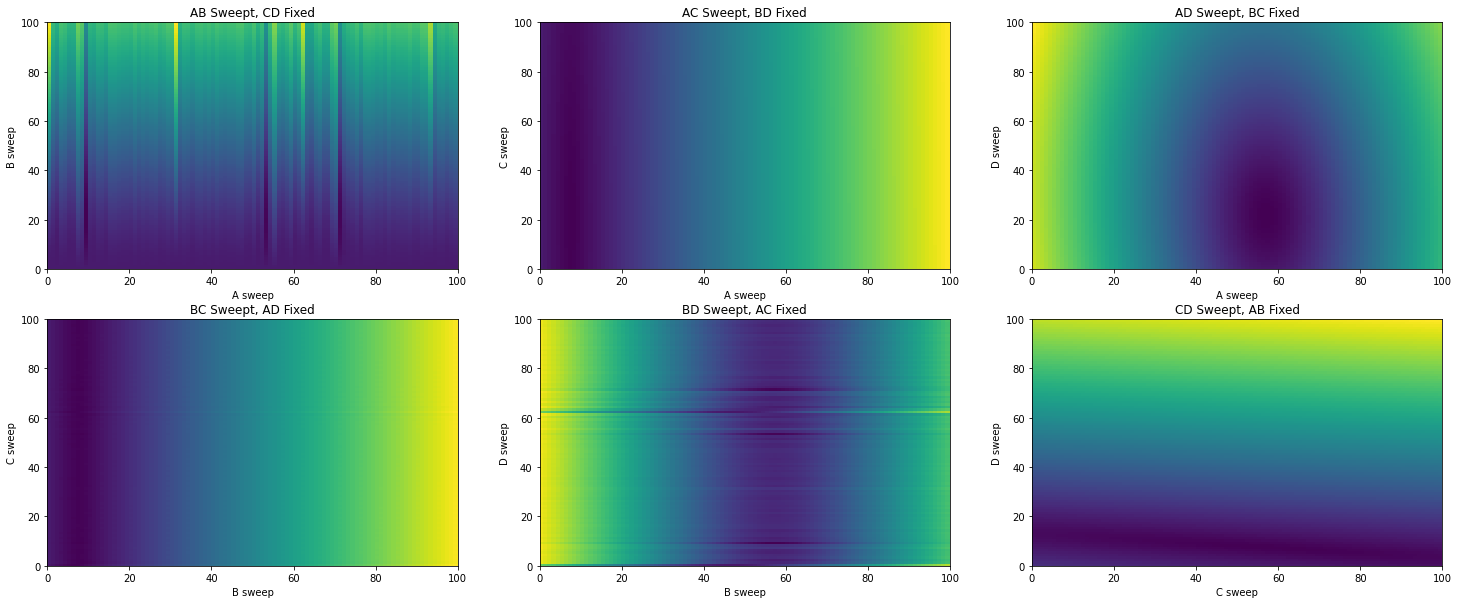

In [5]:
# Part ii


# fix variables to low values
A = params[0]
B = params[1]
C = params[2]
D = params[3]

# create arrays to sweep through 
sweeplen = 100
asweep = np.linspace(0,10,100)
bsweep = np.linspace(0,10,100)
csweep = np.linspace(0,10,100)
dsweep = np.linspace(20,40,100)

# create lanscape variables for each of the sweep combinations
landscapeAB = np.zeros((sweeplen,sweeplen))
landscapeAC = np.zeros((sweeplen,sweeplen))
landscapeAD = np.zeros((sweeplen,sweeplen))
landscapeBC = np.zeros((sweeplen,sweeplen))
landscapeBD = np.zeros((sweeplen,sweeplen))
landscapeCD = np.zeros((sweeplen,sweeplen))

# create each landscape (apologies for not using a function)
for i in range(sweeplen):
    for j in range(sweeplen):
        si = asweep[i]
        sj = bsweep[j]
        paramtest = np.array([si,sj,C,D])
        landscapeAB[i,j] = prob1fit(paramtest,X,Y)

for i in range(sweeplen):
    for j in range(sweeplen):
        si = asweep[i]
        sj = csweep[j]
        paramtest = np.array([si,B,sj,D])
        landscapeAC[i,j] = prob1fit(paramtest,X,Y)

for i in range(sweeplen):
    for j in range(sweeplen):
        si = asweep[i]
        sj = dsweep[j]
        paramtest = np.array([si,B,C,sj])
        landscapeAD[i,j] = prob1fit(paramtest,X,Y)

for i in range(sweeplen):
    for j in range(sweeplen):
        si = bsweep[i]
        sj = csweep[j]
        paramtest = np.array([A,si,sj,D])
        landscapeBC[i,j] = prob1fit(paramtest,X,Y)

for i in range(sweeplen):
    for j in range(sweeplen):
        si = bsweep[i]
        sj = dsweep[j]
        paramtest = np.array([A,si,C,sj])
        landscapeBD[i,j] = prob1fit(paramtest,X,Y)

for i in range(sweeplen):
    for j in range(sweeplen):
        si = csweep[i]
        sj = dsweep[j]
        paramtest = np.array([A,B,si,sj])
        landscapeCD[i,j] = prob1fit(paramtest,X,Y)


fig = plt.figure(figsize=(25,10))

plt.subplot(231)
plt.pcolor(landscapeAB)
plt.title('AB Sweept, CD Fixed')
plt.xlabel('A sweep')
plt.ylabel('B sweep')

plt.subplot(232)
plt.pcolor(landscapeAC)
plt.title('AC Sweept, BD Fixed')
plt.xlabel('A sweep')
plt.ylabel('C sweep')

plt.subplot(233)
plt.pcolor(landscapeAD)
plt.title('AD Sweept, BC Fixed')
plt.xlabel('A sweep')
plt.ylabel('D sweep')

plt.subplot(234)
plt.pcolor(landscapeBC)
plt.title('BC Sweept, AD Fixed')
plt.xlabel('B sweep')
plt.ylabel('C sweep')

plt.subplot(235)
plt.pcolor(landscapeBD)
plt.title('BD Sweept, AC Fixed')
plt.xlabel('B sweep')
plt.ylabel('D sweep')

plt.subplot(236)
plt.pcolor(landscapeCD)
plt.title('CD Sweept, AB Fixed')
plt.xlabel('C sweep')
plt.ylabel('D sweep')

#plt.show()
    


As for commentary on the above color maps. There are clear minima for A, B, and D. This is shown in the middle top graph for A. The darkest shading on the far left shows that A is at minimum on that side. This is the same cases for B and the bottom left graph and D on the bottom right graph. The other graphs are more difficult to see the minima for. 

In [32]:
# Part iii

#Break the data into two separate parts for training and testing
training_data = Y[:20]
testing_data = Y[20:]

Training Error =  2.2427493869061954


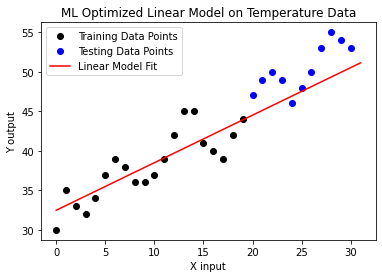

m =  0.6015062065616196
b =  32.48567558069209
Test Error =  3.3636190419092875


In [52]:
# fitting a line 

def linefit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*x + c[1]-y)**2))
    return error

#intialize parameters
lineparams0 = np.array([1,30])

res= opt.minimize(linefit, lineparams0, args=(X[:20], training_data), method='Nelder-Mead')

lineparams = res.x
print('Training Error = ' ,linefit(lineparams,X[0:20],training_data))

x = np.arange(0, 31.01, 0.01)
yfit = (lineparams[0]*x + lineparams[1])

plt.plot(np.arange(0, 20), training_data, 'ko', label = 'Training Data Points')
plt.plot(X[20:], testing_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit, 'r-', label = 'Linear Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Linear Model on Temperature Data')
plt.legend()
plt.show()

# print parameters m (slope) and b (y intercept)
print('m = ', lineparams[0])
print('b = ', lineparams[1])

# now to test model on the test data. 
print('Test Error = ' ,linefit(lineparams,X[20:],testing_data))


Training Error =  2.1255393483415808


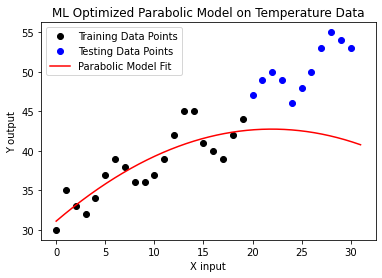

A =  -0.024151350516110746
B =  1.0603766339112415
C =  31.109110377773845
Test Error =  8.713712347662904


In [51]:
# fitting a parabola 

def parabfit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*(x**2) + c[1]*x + c[2]-y)**2))
    return error

#intialize parameters
parbparams0 = np.array([1,1,30])

res= opt.minimize(parabfit, parbparams0, args=(X[:20], training_data), method='Nelder-Mead')

parbparams = res.x
print('Training Error = ' ,parabfit(parbparams,X[0:20],training_data))

x = np.arange(0, 31.01, 0.01)
yfit = (parbparams[0]*(x**2) + parbparams[1] * x + parbparams[2])

plt.plot(np.arange(0, 20), training_data, 'ko', label = 'Training Data Points')
plt.plot(X[20:], testing_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit, 'r-', label = 'Parabolic Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Parabolic Model on Temperature Data')
plt.legend()
plt.show()

# print parameters m (slope) and b (y intercept)
print('A = ', parbparams[0])
print('B = ', parbparams[1])
print('C = ', parbparams[2])
# now to test model on the test data. 
print('Test Error = ' ,parabfit(parbparams,X[20:],testing_data))


Training Error =  0.028351503968806435


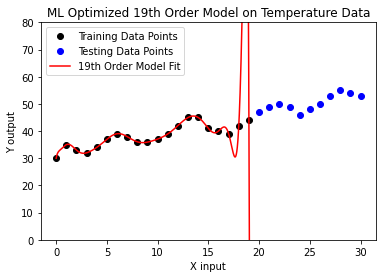

Test Error =  28617752784.428474


In [50]:
# fitting a 19th degree polynomial 

import warnings

def ninefit(x, y):
    n = len(y)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        fit = np.polyfit(x,y,19)
        model = np.poly1d(fit)
        error = np.sqrt((1/n) * np.sum((model(x)-y)**2))
    return fit,error

nineparams, terror = ninefit(X[0:20],training_data) 

print('Training Error = ' , terror)

x = np.arange(0, 30.01, 0.01)
yfit = np.poly1d(nineparams)
plt.plot(np.arange(0, 20), training_data, 'ko', label = 'Training Data Points')
plt.plot(X[20:], testing_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit(x), 'r-', label = '19th Order Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized 19th Order Model on Temperature Data')
plt.legend()
plt.ylim(0,80)
plt.show()

# print parameters
#print(nineparams)

# now to test model on the test data. 
n = len(testing_data)
testerr = np.sqrt((1/n) * np.sum((yfit(X[20:])-testing_data)**2))

print('Test Error = ' , testerr)


In [41]:
# Part iv - repeating part iii but with different data sections

# redefine testing and training data sets
training2_data = np.concatenate((Y[0:10], Y[20:31]))
testing2_data = Y[10:20]

Xchange = np.concatenate((X[0:10], X[20:31]))

Training Error =  1.8093693862954388


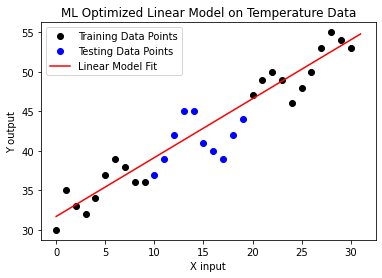

m =  0.744322058157542
b =  31.705585215976996
Test Error =  2.948759116314769


In [48]:
# fitting a line 

def linefit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*x + c[1]-y)**2))
    return error

#intialize parameters
lineparams0 = np.array([1,30])

res= opt.minimize(linefit, lineparams0, args=(Xchange, training2_data), method='Nelder-Mead')

lineparams = res.x
print('Training Error = ' ,linefit(lineparams,Xchange,training2_data))

x = np.arange(0, 31.01, 0.01)
yfit = (lineparams[0]*x + lineparams[1])

plt.plot(Xchange, training2_data, 'ko', label = 'Training Data Points')
plt.plot(X[10:20], testing2_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit, 'r-', label = 'Linear Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Linear Model on Temperature Data')
plt.legend()
plt.show()

# print parameters m (slope) and b (y intercept)
print('m = ', lineparams[0])
print('b = ', lineparams[1])

# now to test model on the test data. 
print('Test Error = ' ,linefit(lineparams,X[10:20],testing2_data))


Training Error =  1.8092312299529143


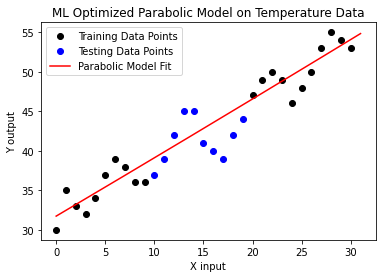

A =  0.00035774226063063256
B =  0.7336568656119132
C =  31.744246718626954
Test Error =  2.935304911369739


In [45]:
# fitting a parabola 

def parabfit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*(x**2) + c[1]*x + c[2]-y)**2))
    return error

#intialize parameters
parbparams0 = np.array([1,1,30])

res= opt.minimize(parabfit, parbparams0, args=(Xchange, training2_data), method='Nelder-Mead')

parbparams = res.x
print('Training Error = ' ,parabfit(parbparams,Xchange,training2_data))

x = np.arange(0, 31.01, 0.01)
yfit = (parbparams[0]*(x**2) + parbparams[1] * x + parbparams[2])

plt.plot(Xchange, training2_data, 'ko', label = 'Training Data Points')
plt.plot(X[10:20], testing2_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit, 'r-', label = 'Parabolic Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Parabolic Model on Temperature Data')
plt.legend()
plt.show()

# print parameters m (slope) and b (y intercept)
print('A = ', parbparams[0])
print('B = ', parbparams[1])
print('C = ', parbparams[2])

# now to test model on the test data. 
print('Test Error = ' ,parabfit(parbparams,X[10:20],testing2_data))


Training Error =  0.22431434401313172


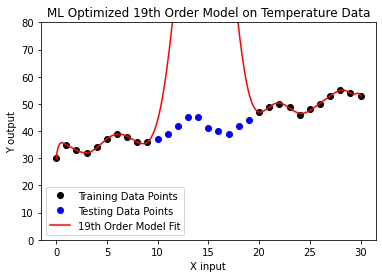

Test Error =  81.93347036362428


In [49]:
# fitting a 19th degree polynomial 

def ninefit(x, y):
    n = len(y)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        fit = np.polyfit(x,y,19)
        model = np.poly1d(fit)
        error = np.sqrt((1/n) * np.sum((model(x)-y)**2))
    return fit,error

nineparams, terror = ninefit(Xchange,training2_data) 

print('Training Error = ' , terror)

x = np.arange(0, 30.01, 0.01)
yfit = np.poly1d(nineparams)
plt.plot(Xchange, training2_data, 'ko', label = 'Training Data Points')
plt.plot(X[10:20], testing2_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit(x), 'r-', label = '19th Order Model Fit')
plt.ylim(0,80)
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized 19th Order Model on Temperature Data')
plt.legend()
plt.show()

# print parameters
#print(nineparams)

# now to test model on the test data. 
n = len(testing2_data)
testerr = np.sqrt((1/n) * np.sum((yfit(X[10:20])-testing2_data)**2))

print('Test Error = ' , testerr)


#### Discussion of Comparison between Parts 3 and 4
We can observe that when the first 20 data points are selected the model creates a decent representation of those training points. The training errors for part 3 linear and parabolic fits are about 2. The 19th degree polynomial fit has a much lower training error because the parameters are designed to go through many of the points. This is similar to part 4 with there being error close to 2 for the linear and parabolic fit and much smaller error in the 19th degree polynomial. Simply put, in training the two methods have similar error when creating a model.
However, when applied to the different testing data points, the methods in parts 3 and 4 greatly differ. Part 3 in the parabolic and 19th order had much higher error levels than the Part 4 method. This is emphasized by an error of nearly 30 billion for the 19th degree polynomial when applied to the testing data of part 3. The main reason for this difference was that the part 3 division lead towards the lacking conclusion that the data continued upwards. In a parabolic fit the optimal model "assumed" the data would decrease in the next section. In the 19th order polynomial the optimal model had so much wiggle that it completely decreased after the training data. In part 4 the model has to instead "fill in the middle" information. This leads to much less error with these select fitting methods